- - - -
# Mechpy
a mechanical engineer's toolbox   

To view this notebook, use the [nbviewer](http://nbviewer.jupyter.org/github/nagordon/mechpy/blob/master/mechpy.ipynb)
- - - -

##  [Getting Started with Engineering Python](#Engineering-Python)  
 * getting started
 * packages
 * math with numpy and sympy
 * plotting
 


### Modules


## 1) [Statics](#Statics)
* [Example 1: A simple supported beam with shear-bending plots](#Statics-Example-1)
* [Example 2: Vector calculation method to calculate 3-D moments](#Statics-Example-2)
* [Distributed Loads Calculations](#Distributed-Loads-Calculations)

## 2) [Materials](#Materials)
* [composite mechanics](#Composite-Mechanics)
* [composite plates](#Composite-Plates)  


## 3) Kinematics
* [double_pendulum](http://matplotlib.org/examples/animation/double_pendulum_animated.html)


## 4) Dynamics 
* [dynamics](#Dynamics)
* [Python Vibration Codes](http://vibrationdata.com/software.htm)
* [Dynamics Notes](#Dynamics-Vibrations-Notes)

## 5) Design
* [Factors of Safety](#(Factors-of-Safety)  


## Appendix A: [Engineering Mathematics with Python](#Engineering-Mathematics-with-Python)
[Differential Equations](#Differential-Equations)  
[Linear Algebra](#Linear-Algebra)  
[Signal Processing](#Signal-Processing)  
[Finite Element Method](#Finite-Element-Method)
* [solids FEM example](#FEM-Example-1)  

[Curve Fitting](#Curve-Fitting)   

[Units](#Units)    


## Appendix B: [Engineering Software APIs](Engineering-Software-APIs)

[Abaqus](Abaqus)  
[CATIA](CATIA)  
[Excel](Excel)  


- - - -


In [ ]:
!jupyter nbconvert --to html mechpy.ipynb

## Python Initilaization with module imports

In [ ]:
# setup 
import numpy as np
import sympy as sp
import scipy
from pprint import pprint
sp.init_printing(use_latex='mathjax')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)  # (width, height)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 16
from matplotlib import patches

get_ipython().magic('matplotlib')  # seperate window
get_ipython().magic('matplotlib inline') # inline plotting

- - - -
# Statics 
[index](#Mechpy)
- - - -

The sum of the forces is zero
$$
\Sigma F_x =0 , \Sigma F_y =0 , \Sigma F_z =0  
$$
The sum of the moments is zero
$$
\Sigma M_x =0 , \Sigma M_y =0 , \Sigma M_z =0  
$$

Dot Product

$$
\vec{A} \bullet \vec{B} = ABcos\left(\theta\right)= A_xB_x + A_yB_y+A_zB_z
$$

Cross-Product

$$
\vec{C}=\vec{A} \times \vec{B} = 
\begin{vmatrix}
    \widehat{i} & \widehat{j} & \widehat{k}\\
    A_{x} & A_{y} & A_{z}\\
    B_{x} & B_{y} & B_{z}
\end{vmatrix} 
$$

Moment of Force
$$
M_0 = Fd \\
\vec{M_0}=\vec{r}\times \vec{F} = 
\begin{vmatrix}
    \widehat{i} & \widehat{j} & \widehat{k}\\
    r_{x} & r_{y} & r_{z}\\
    F_{x} & F_{y} & F_{z}
\end{vmatrix} 
$$

Moment of Force about a Specified axis
$$
\vec{M_a}=\vec{u}\bullet\vec{r}\times \vec{F} = 
\begin{vmatrix}
    u_{x} & u_{y} & u_{z} \\
    r_{x} & r_{y} & r_{z} \\
    F_{x} & F_{y} & F_{z}
\end{vmatrix} 
$$


### Statics-Example 1
#### A simple supported beam with shear-bending plots

In [ ]:
from mechpy.statics import simple_support
simple_support()

### Statics-Example 2
### Vector calculation method to calculate 3-D moments

$
\vec{M_{R_0}}=\Sigma \left( \vec{r} \times \vec{F} \right) = \vec{r_A}\times\vec{F_1} +\vec{r_A}\times\vec{F_2} + \vec{r_B}\times\vec{F_3}
$

In [ ]:
from mechpy.statics import moment_calc
moment_calc()

### Distributed Loads Calculations

$
F_R = \Sigma F=\int_L w(x) \,dx  = \int_A dA \,dx  
$

example, hibbler, pg 187

$$
F_R=\int_A dA \, =  \int_{0}^{2} \, 60x^2 \, dx = 160 N
$$

$$
 \overline{x} = \frac{\int_A x \, dA}{\int_A dA} =  \frac{\int_{0}^{2} x60x^2 \, dx}{\int_{0}^{2} \, 60x^2 \, dx} = \frac{240}{160}
$$

In [ ]:
x = sp.var('x')
w = 60*x**2# N/m
sp.plot(w, (x,0,2));

In [ ]:
w.subs(x,2)

In [ ]:
sp.Integral(w,(x,0,2))

In [ ]:
sp.integrate(w)

In [ ]:
sp.integrate(w,(x,0,2))

In [ ]:
sp.Integral(x*w,(x,0,2))

In [ ]:
sp.integrate(w*x)

In [ ]:
sp.integrate(x*w,(x,0,2))

In [ ]:
FR= float(sp.integrate(w,(x,0,2)))
xbar = float(sp.integrate(x*w,(x,0,2)))/FR
print('center of load of an exponential distributed load is %f' % xbar)

In [ ]:
#hibbler pg 346

import numpy as np

r = np.array([    0, 3 , 5.25])
F = np.array([-13.5, 0 ,6.376])
M = -np.cross(r,F)

# moments 
print('M_x = %f \nM_y = %f \nM_z = %f' % (M[0], M[1], M[2] ))

# Materials
[index](#Mechpy)

## Stress and Strain
Stress is a tensor that can be broken into 

$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{xx} & \sigma_{xy} & \sigma_{xz}\\
 \sigma_{yx} & \sigma_{yy} & \sigma_{yz}\\
 \sigma_{zx} & \sigma_{zy} & \sigma_{zz}
 \end{bmatrix} 
$$



## Factors of safety
In aerospace, typically 1.2 for civilian aircraft and 1.15 for military

$$FS=\frac{\sigma_{yield}}{\sigma}-1$$  

## Fastener Notes and Formulas

Finding the centroid of a bolt with coordinates, $\overline{x},\overline{y}$
$$ \overline{x}=\frac{\sum_{i=1}^{n_b}{A_i x_i} }{\sum_{i=1}^{n_b}{A_i} } \ \ \overline{y}=\frac{\sum_{i=1}^{n_b}{A_i y_i} }{\sum_{i=1}^{n_b}{A_i}}$$

Joint/Polar Moment of Inertia, $r=$ distance from centroid to fastener
$$J= \int{r^2dA}= \sum_{i=1}^{n_b}{A_k r_k^2}$$

Bearing Stress on a bolt
$$\sigma^i_{bearing}=\frac{V_{max}}{Dt}$$

Shear Stress on each bolt i due to shear force
$$\tau_f^i = \frac{P}{\sum_{i=1}^{n_b}{A_i} }$$  
Where $A_i=$ the area of ith bolt, $n_b=$number of bolts, and $P=$ shear force

Shear Stress on each bolt i due to moment
$$\tau_t^i = \frac{T r_i}{J} $$  

### Modes of failure of fastened Joints
1. Tensile Plate Failure across the net section between rivets/bolts
2. Failure of rivets through shear
3. Compression failure between rivet and plate
4. Edge shear-out at rivet hole
5. Edge tearing at rivet hole

#### 1.

$$\sigma_t =\frac{F_s}{(b-nd)t}$$

#### 2.

#### 3.

#### 4.

#### 5.



## Adhesive Joints

With members, or adherends, joined with adhesives, either the member will fail due to tensile loads or the adhesive will fail in shear.

The simple solution to finding the stress of bonded surfaces is taking the average stress
$$\tau_{avg}=\frac{P}{bL}$$, is not an accurate way to model maximum stress. A good rule of thumb based on the calculations below is 
$$\tau_{max}=2.08\tau_{avg}$$

The maximum shearing stress of an adhesive layer, $\tau_{max}$, can be computed as 
$$\tau_{max}=K_s\tau_{avg}=K_s\left(\frac{P}{bL_L}\right)$$
with $P$ as applied load, $b$ as the width ofthe adhesive layer, and $L_L$ as the length ofthe adhesive layer. The stress distribution factor, $K_s$, can be defined as $K_s=\frac{cL}{tanh(CL/2)}$ where $c=\sqrt{\frac{2G_a}{Et_mt_a}}$, where the shear modulus, $G_a=\frac{\tau}{\gamma}$, and $E$ as the modulus of elasticity.


The max shearing stress, $\tau_{max}$ in a scarf joint can be found with 
$$\tau_{max}=K_s\tau_{avg}=K_s\left[ \frac{Pcos\theta}{\left(\frac{bt}{sin\theta} \right)  } \right] = K_s\left(  \frac{P}{bt} sin\theta cos\theta \right)$$
where $t$ is the thickness of the adherend members and $\theta=tan^{-1}\frac{t}{L_s}$ is the scarf angle

*Mechanical Design of Machine Elements and Machines by Collins, Jack A., Busby, Henry R., Staab, George H. (2009)*

In [ ]:
%matplotlib inline

In [ ]:
## Bolted Joint Example

# fastener Location
from mechpy.design import fastened_joint
fx = [0,1,2,3,0,1,2,3]
fy = [0,0,0,0,1,1,1,1]
# Force magnitude(x,y)
P = [-300,-500]
# Force location
l = [2,1]
df = fastened_joint(fx, fy, P, l)

df.plot(kind='scatter', x='x', y='y');
#df.plot(style='o', x='x', y='y')
plt.plot(df.xbar[0],df.ybar[0],'*')
df
#ax = plt.gca()
#ax.arrow(l[0], l[1], Pnorm[0],Pnorm[1], head_width=0.05, head_length=0.1, fc='k', ec='k')
#x.arrow(xbar, ybar, Pnorm[0],0, head_width=0.05, head_length=0.1, fc='k', ec='k')
#ax.arrow(xbar, ybar, 0,Pnorm[1], head_width=0.05, head_length=0.1, fc='k', ec='k')

## Composite Mechanics
[index](#Mechpy)

In [ ]:
from mechpy.math import T3rot, T6rot
from mechpy.composites import laminate, material_plots, laminate_gen

In [ ]:
import importlib
importlib.reload

In [ ]:
from mechpy.math import T2rot
T2rot(45)

In [ ]:
from IPython.html.widgets import *

plt.figure(figsize=(12,8))
x = [-1,1, 0,-1,]
y = [-1,-1,1,-1]
xy = np.array([x,y])
plt.xlim([-11.1,11.1])
plt.ylim([-11.1,11.1])
xyR = np.dot(T2rot(30),xy)
#plt.plot(xyR[0,:],xyR[1,:])
def rot2(th, xt,yt,zt):
    xyR = np.dot(T2rot(th),xy*zt)
    xyR[0,:]+=xt
    xyR[1,:]+=yt
    plt.plot(xyR[0,:],xyR[1,:])
    plt.axis('square')
    plt.xlim([-11.1,11.1])
    plt.ylim([-11.1,11.1])    
    plt.show()

interact(rot2, th=(0,np.pi,np.pi/90), yt=(1,10,1), xt=(1,10,1), zt=(1,10,1));

In [ ]:
print(T6rot(45,45,45))

In [ ]:
help(laminate_gen)

In [ ]:
material_plots()

In [ ]:
laminate()

## Composite Plates  
[index](#Mechpy)  


# Stress Transformations
[index](#Mechpy)  

$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{xx} & \sigma_{xy} & \sigma_{xz}\\
 \sigma_{yx} & \sigma_{yy} & \sigma_{yz}\\
 \sigma_{zx} & \sigma_{zy} & \sigma_{zz}
 \end{bmatrix} 
$$

reduce to plane stress

$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{xx} & \sigma_{xy} & 0 \\
 \sigma_{yx} & \sigma_{yy} & 0\\
 0 &           0 &           \sigma_{zz}
 \end{bmatrix} 
$$

or

$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{xx} & \tau_{xy} & 0 \\
 \tau_{yx} & \sigma_{yy} & 0\\
 0 &           0 &           \sigma_{zz}
 \end{bmatrix} 
$$


$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{x} & \sigma_{xy} \\
 \sigma_{yx} & \sigma_{y} \\
 \end{bmatrix} 
$$

Transformation

$$
A=\begin{bmatrix}
 cos(\theta) & sin(\theta) \\
 -sin(\theta) & cos(\theta) \\
 \end{bmatrix} 
$$

$$
\sigma'=A \sigma A^T
$$


$$
\sigma_1 , \sigma_2 = \frac{\sigma_{x}}{2} + \frac{\sigma_{y}}{2} + \sqrt{\tau_{xy}^{2} + \left(\frac{\sigma_{x}}{2} - \frac{\sigma_{y}}{2}\right)^{2}}
$$


$$
T=\left[\begin{matrix}\sin^{2}{\left (\theta \right )} & \cos^{2}{\left (\theta \right )} & 2 \sin{\left (\theta \right )} \cos{\left (\theta \right )}\cos^{2}{\left (\theta \right )} & \\
\sin^{2}{\left (\theta \right )} & - 2 \sin{\left (\theta \right )} \cos{\left (\theta \right )}\- \sin{\left (\theta \right )} \cos{\left (\theta \right )} & \\
\sin{\left (\theta \right )} \cos{\left (\theta \right )} & \sin^{2}{\left (\theta \right )} - \cos^{2}{\left (\theta \right )}\end{matrix}\right]
$$

In [ ]:
import sympy as sp
from sympy.abc import tau, sigma
import numpy as np
sp.init_printing()

In [ ]:
sx,sy,txy,tp = sp.symbols('sigma_x,sigma_y,tau_xy,theta_p')
sp1 = (sx+sy)/2 + sp.sqrt( ((sx-sy)/2)**2 + txy**2 )
sp2 = (sx+sy)/2 - sp.sqrt( ((sx-sy)/2)**2 + txy**2 )
print(sp.latex(sp1))
sp1

In [ ]:
tp = sp.atan(2*txy/(sx-sy) )/2
tp

In [ ]:
tpp = tp.evalf(subs={sx:10,sy:15,txy:10})
tpp

In [ ]:
#s,s11,s22,s33,s12 = sp.var('s,s11,s22,s33,s12')
s,s11,s22,s33,s12,s13,t,t12 = sp.symbols('sigma, sigma11,sigma22,sigma33,sigma12,sigma13,tau,tau12')
s = sp.Matrix([[s11,t12,0],[t12,s22,0],[0,0,s33]])
s

In [ ]:
t = sp.symbols('theta')
m = sp.sin(t)
n = sp.cos(t)
T = sp.Matrix([[m**2,n**2, 2*m*n],[n**2,m**2,-2*m*n],[-m*n,m*n,m**2-n**2]])
T

In [ ]:
T1 = T.subs(t, sp.pi/4)
T1

In [ ]:
sprime = T1 * s * T1.inv()
sprime

In [ ]:
sprime.evalf(subs={s11:10, s22:00, s33:0, t12:0})

In [ ]:
s.eigenvals() 

In [ ]:
s2 = s.evalf(subs={s11:2.2, s22:3, s33:sp.pi, s12:7.3})
s2

In [ ]:
sigma = np.array([[90,60],
                  [60,-20]])
np.linalg.eigvals(sigma)

In [ ]:
# PLane Stress

tauxy = 1    # lbs/in 
sigmax = 0   # lbs/in
sigmay = 0   # lbs/in

sigma = np.array([[sigmax, tauxy,0],
                  [tauxy,   sigmay,0],
                 [0,0,0]])

sigmap = np.linalg.eig(sigma)[0]
print(sigmap)

thetap = np.linalg.eig(sigma)[1]  # degrees

print('cosine angle')
print(thetap )  # cosine angle

print('plane angle')
print(np.arccos(thetap)*180/np.pi)

In [ ]:
# maximum in-plane shear stress
eps = 1e-16   # machine epsilon to avoid divide-by-zero error
rad_to_deg = 180/np.pi
theta1 = 0.5 * np.arctan( 2*tauxy / ((sigmax-sigmay+eps))) * rad_to_deg
print(theta1)

In [ ]:
tauxy = 0    # lbs/in 
sigmax = 100   # lbs/in
sigmay = np.linspace(0,1.100)   # lbs/in

eps = 1e-16   # machine epsilon to avoid divide-by-zero error
rad_to_deg = 180/np.pi
theta1 = 0.5 * np.arctan( 2*tauxy / ((sigmax-sigmay+eps))) * rad_to_deg
print(theta1)

# sigmax = 100
# sigmay = np.linspace(0,1.100)
# tauxy = 0
# tparray = sp.atan(2*tauxy/(sigmax-sigmay) )/2
# tparray

In [ ]:
sigma

In [ ]:
th = np.pi/4  # 45 deg
m = np.cos(th)
n = np.sin(th)
A = np.array([ [m,n],[-n,m]])

tauxy = 1    # lbs/in 
sigmax = 0   # lbs/in
sigmay = 0   # lbs/in

sigma = np.array([[sigmax, tauxy],
                  [tauxy,   sigmay]])

sigmat = A @ sigma @ A.T  # transformed stress
sigmat

In [ ]:
sigmap = np.linalg.eig(sigmat)[0]  # principal stresses
print(sigmap)

thetap = np.linalg.eig(sigmat)[1]  # principal planes
print(thetap* 180/np.pi)

In [ ]:
from ipywidgets import IntSlider
IntSlider()

In [ ]:
# Principal Stresses

sx  = 63.66
sy  = 0
sz  = 0
txy = 63.66
txz = 0
tyz = 0

S = np.matrix([[sx, txy, txz],
            [txy, sy, tyz],
            [txy, txz, sz]])

print(S)

In [ ]:
principal_stresses = np.linalg.eigvals(S)
print(principal_stresses)

In [ ]:
import sympy as sp
from sympy.abc import tau, sigma
#s,s11,s22,s33,s12 = sp.var('s,s11,s22,s33,s12')
s,s11,s22,s33,s12,s13 = sp.symbols('sigma, sigma11,sigma22,sigma33,sigma12,sigma13')
s = sp.Matrix([[s11,s12,0],[s12,s22,0],[0,0,s33]])
s

In [ ]:
s**2

In [ ]:
s.eigenvals()  # hmm looks familiar

In [ ]:
s1 = s.subs(s11,2.2).subs(s22,3).subs(s33,sp.pi).subs(s12,7.3)
s1

In [ ]:
# or 
s2 = s.evalf(subs={s11:2.2, s22:3, s33:sp.pi, s12:7.3})
s2

In [ ]:
s1.eigenvals()

In [ ]:
s2.eigenvals()

In [ ]:
s2.inv()

In [ ]:
C = sp.symbols('C1:100')
C

In [ ]:
from mechpy.math import ode1
ode1()

## Dynamics Vibrations Notes
**Jul 1, 2015**

## Introduction
<div id="sec:intro"></div>

modal analysis is similar to frequency analysis. In frequency analysis a complex signal is resolved into a set of simple sine waves with individual frequency and amplitude and phase parameters. In modal analysis, a complex deflection pattern of a vibrating structure is resolved into a set of simple mode shapes with the same individual parameters. 


## Structural Dynamics Background
<div id="sec:stdybg"></div>

Most systems are actually multiple degrees of freedom (MDOF) and have some non-linearity, but can be simplified with a superposition of SDOF linear systems 

Newtons law states that acceleration is a function of the applied force and the mass of the object, or
$$
[inertial forces] + [Dissipative forces] + [Restoring Forces] = [External Forces] \\
m\ddot{x} + c\dot{x} + kx = f(t)  \\
\zeta<1 is\ underdamped  \\
$$

some other dynamic characteristics are
$$
\omega = frequency  \\
\zeta = damping     \\
\{\phi\} = mode shape  \\
\omega^{2}_{n}=\frac{k}{m} = natural frequency \\
\zeta = \frac{c}{\sqrt{2km}}    \\
H(\omega)=Frequency\ Response \\
\phi(\omega)=Phase
$$

## Damping Model

Where there is energy dissipation, there is damping. The system can be broken into the system inputs/excitation, a system G(s), and the output response, in Laplace or space

The transfer function is a math model defining the input/output relationship of a physical system. Another definition is the Laplace transform ( $\mathcal{L}$) of the output divided by the Laplace transform of the input. 

The frequency response function (FRF) is defined in a similar manner such that FRF is the fourier transform ($ \mathcal{F} $) of the input divided by the fourier transform of the output

$$
Transfer\ Function=\frac{Output}{Input} \\
G(s) = \frac{Y(s)}{X(s)}
$$

## Modal Testing

These relationships can be further explained by the modal test process. The measurements taken during a test are frequency response function measurements. The parameter estimation routines are curve fits in the Laplace domain and result in transfer functions.

Frequency Response Matrix

$$
\begin{bmatrix}
 H_{11} & H_{12} & \cdots & H_{1n} \\
 H_{21} & H_{22} & \cdots & H_{2n} \\
 \vdots  & \vdots  & \ddots & \vdots  \\
 H_{n1} & H_{n2} & \cdots & H_{nn} 
\end{bmatrix}
$$

## Random Notes
<div id="sec:rand"></div>

The signal-analysis approach is done by measuring vibration with accelerometers and determine the frequency spectrum. The other moethod is a system -analysis where a dual-channel FFT anlayzer is used to measure the ratio of the response to the input giving the frequency response function (FRF)

a modal model allows the analysis of structural systems

a mode shape is a deflection-pattern associated with a particular modal frequency or pole location. It is not tangible or easily observed. The actual displacement of the structure will be a sum of all the mode shapes. A harmonic exitation close to the modal frequency, 95% of the displacement may be due to the particular modeshape

Modal Descriptions Assumes Linearity
 * Superposition of the component waves will result in the final wave. A swept sinosoid will give the same result as a broadband excitation

 * Homogeneity is when a measured FRF is independent of excitation level

 * Reciprocity implies that the FRF measured between any two DOFs is independent of which of them for excitation or response

 * small deflections - cannot predict buckling or catastrophic failure

 * casual - the structure will not vibrate before it is excited

 * stable - the vibrations will die out when the excitation is removd

 * time-invariant - the dynamic characteristics will not change during the measurments

## The Lumped-Parameter Model and Modal Theory

[Physical Coordinates] = [Modal Matrix][Modal Coordinates]

$$
[x] = [\phi][q]
$$

## Keywords and Notations

$$
m=mass        \\
k=stiffness   \\
c = damping coefficient  \\
c_c = critical damping coefficient  \\
$$



## Finite-Element-Method
[index](#Mechpy) 

The element connectivty is used to assemble the global stiffness matrix, the nodal force matrix, and the displacement matrix

The minimization of the potentail energy is used to solve the global equation once the boundary conditions are applied to prevent rigid body motion

$ \{F\} = [K]\{U\} $

where  

$ \{F\}=nodal\ force\ matrix $  
$ [K] = global\ stiffness\ matrix $  
$ \{U\} = nodal\ displacement\ matrix $  

Once the displacements, U are computed, the strain, $\bar{\varepsilon}$ is calcualted 

with $\{\varepsilon\}=[B]\{U\}$

where

$[B]=strain-displacement\ matrix$

and stresses, $\bar{\sigma}$ are determined via Hookes Law and 

$\{\sigma\}=[C]\{\varepsilon\}$

where  

$[C] = compliance\ matrix$


### FEM-Example-1

In [ ]:
from mechpy.fem import cst_fem
cst_fem(structure='9node')

## Curve-Fitting 
[index](#Mechpy)  


In [ ]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#==============================================================================
# Method 1 - polyfit
#==============================================================================
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = [1,2,3,4]
y = [3,5,7,10] # 10, not 9, so the fit isn't perfect
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
plt.text(4,4,fit_fn)
plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
plt.xlim(0, 5)
plt.ylim(0, 12)

In [ ]:
import matplotlib.pyplot as plt

x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)

p = np.poly1d(z)
print(p)

p6 = np.poly1d(np.polyfit(x, y, 6))
print(' ------------------------------------------ ')
print(p6)

xp = np.linspace(-2, 6, 100)
plt.plot(x, y, '.', xp, p(xp), '-', xp, p6(xp), '--')
plt.ylim(-2,2)

plt.show()

In [ ]:
#==============================================================================
# Hmk from numerical methods class
#==============================================================================
X = np.array([0,  1, 2, 3,  4,  5])
Y = np.array([4, -1, 6, 1, -4, -9])
order=3 # integer > 0
C = np.polyfit(X,Y,order);
C = np.flipud(C)

h = 1000
xfit = np.linspace(min(X),max(X),h);
yfit = np.zeros(len(xfit))

for i,c in enumerate(C):
    yfit += c*xfit**i

plt.plot(X,Y,'o',xfit,yfit)
plt.title('third order polynomnial least sqaures fit')
plt.show()

In [ ]:
#==============================================================================
# non-linear least squares
#==============================================================================

from scipy.optimize import curve_fit
X = np.array([0 ,   1 , 2 ,   3 ,   4 ,   5 ])
Y = np.array([0.1,  1 , 1.5 , 0.8 , 0.3 , 0.25 ])
fn = lambda a: (a[0]*X+a[1]) * np.exp(a[2]*X+a[3])
Sn = lambda x: np.sum( (fn(x)-Y)**2 )
A = sp.optimize.fmin(func=Sn, x0=[0,0,0,0])
plt.plot(X, Y,'o')
xplot = np.linspace(0,5,100)
fnfit = lambda x,a: (a[0]*x+a[1]) * np.exp(a[2]*x+a[3])
plt.plot(xplot, fnfit(xplot, A))

In [ ]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.figure(figsize=(16,7))
mpl.rcParams['font.size'] = 16

X = np.array([1, 2,    3,   4 ,    5 ])
Y = np.array([2, 3.25, 3.5, 3.75 , 3.8])

# a[0] is the x asymptote and a[1] is the y asymptote and 
fn = lambda a: -1/(X-a[0]) + a[1]
Sn = lambda x: np.sum( (fn(x)-Y)**2 )

A = scipy.optimize.fmin(func=Sn, x0=[0,0])
print(A)
plt.plot(X, Y,'o')
xplot = np.linspace(0.75 , 5,100)
fnfit = lambda x,a: -1/(x-a[0]) + a[1]

plt.subplot(1,2,1)
eps = 1e-16
xp = 0.5
yp = 4
x = np.linspace(xp,4,100)
y = -1/(x-xp+eps)+yp
plt.plot(x,y)
plt.ylim([0,yp])
plt.title('plot of how the function should look with actual parameters')


plt.plot(xplot, fnfit(xplot, A))
plt.plot(X,Y, 'o')
plt.title(r'$f(x)=\frac{-1}{x-a_0}+a_1$')
#plt.text(2,1,r'$f(x)=\frac{-1}{x-0.494}+3.969$')

In [ ]:
#==============================================================================
# 
#==============================================================================
import numpy as np
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
ydata = y + np.random.normal(size=len(xdata))
popt, pcov = curve_fit(func, xdata, ydata)
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 2., 1.]))

plt.plot(xdata, y)

yfit = func(xdata, popt[0], popt[1], popt[2])
plt.plot(xdata, yfit, 'o')

## Linear Algebra with Python
[index](#Mechpy)  

Python's numpy package allows python, a generic computing language to perform powerful mathematical calculations. Although python's math syntax is not as obvious as MATLAB's, the functionality is comparable. This document is designed to be an intro to that syntax 

Some references

http://nbviewer.ipython.org/github/carljv/cython_testing/blob/master/cython_linalg.ipynb

We can either use scipy, which includes numpy, 
http://docs.scipy.org/doc/

or use numpy directly
http://docs.scipy.org/doc/numpy/

Since there are many ways to solve linear algebra problems, (eg Octave/Matlab, julia, scipy, numpy)
I tend to prefer the most matlabesc approaches due to the ubiquity of Matlab and the simplicity of the syntax, which frankly, python suffers with.

The major difference between arrays and matrices in python is that arrays are n-dimensions, where matrices are only up to 2-dimensions  
m

In [ ]:
import numpy as np
from scipy import linalg

Pythons list is a generic data storage object. it can be easily extended to a numpy array, which is specialized for numerical and scientific computation 

In [ ]:
np.zeros((5,3))

In [ ]:
np.array([[1,2],[3,4]])

In [ ]:
np.matrix(np.zeros((5,3)))

In [ ]:
np.matrix([[1,2],[3,4]])

In [ ]:
# Matrix multiplication can be achieved using the dot method
i = [[1,0,0],[0,1,0],[0,0,1]]  # identiy matrix
a = [[4,3,1],[5,7,2],[2,2,2]]
np.dot(i,a)


In [ ]:
#Or, matrix multiplication can be done if a matrix is explicitly defined
np.matrix(i)*np.matrix(a)

In [ ]:
# Notice, when arrays are mutliplied, we get the dot product 
np.array(i)*np.array(a)

In [ ]:
# convert an array to a matrix
m = np.matrix(a)
m

In [ ]:
m.T  # transpose

In [ ]:
m.I  # inverse

In [ ]:
m**2

In [ ]:
np.array(a)**2

In [ ]:
m

In [ ]:
m[:,2]

In [ ]:
m[2,:]

In [ ]:
m[:2,:2]

In [ ]:
m[1:,1:]

## Sympy Linear Algebra

In [ ]:
# import sympy
import sympy as sp
#from sympy.mpmath import *

In [ ]:
x = sp.Symbol('x')   # x = var('x')
M = sp.Matrix([[2,x],[x,3]])
M

In [ ]:
M.eigenvals()

In [ ]:
M.eigenvects()

In [ ]:
M.eigenvects()[1][0]

In [ ]:
Mval = M.eigenvects()[1][0]
Mval.evalf(subs={x:3.14})

In [ ]:
print(sp.latex(M))

copy and paste into markdown 

$ \left[\begin{matrix}2 & x\\x & 3\end{matrix}\right] $


## Signal Processing
Page 174 Introduction for python for Science - David Pine

In [ ]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
width = 2.0
freq = 0.5
t = np.linspace(-10, 10, 101) # linearly space time array
g = np.exp(-np.abs(t)/width)*np.sin(2.0 * np.pi * freq * t)
dt = t[1]-t[0] # increment between times in time array
G = fftpack.fft(g) # FFT of g
f = fftpack.fftfreq(g.size, d=dt) # frequenies f[i] of g[i]
f = fftpack.fftshift(f) # shift frequencies from min to max
G = fftpack.fftshift(G) # shift G order to coorespond to f
fig = plt.figure(1, figsize=(8,6), frameon=False)
ax1 = fig.add_subplot(211)
ax1.plot(t, g)
ax1.set_xlabel('t')
ax1.set_ylabel('g(t)')
ax2 = fig.add_subplot(212)
ax2.plot(f, np.real(G), color='dodgerblue', label='real part')
ax2.plot(f, np.imag(G), color='coral', label='imaginary part')
ax2.legend()
ax2.set_xlabel('f')
ax2.set_ylabel('G(f)')
plt.show()

# Design

## Factors of Safety

DLL, Design Limit Load = max force or moment expected during a mission with a given statistical probability  

Al, Allowable =  allowed minimum applied load or strength of a structure at a given statistical probablity  

FS, factor of safety [1, $\infty$] = a factor applied to a DLL to decrease the chance of failure, typically around 1-3  

KD, knockdown (0,1] = a percentage reduction of Allowable load to reduce the chance of failure

A KD=0.8 would be applied to the allowable to reduce it by 20%, $Al_{new}=Al_{old}*KD$   

MS, margin of safety = a measure of reserve strength , how much applied loda can increase before the safety of the vehicle is comprimised. $ MS\geq0$ for a good design, $MS=\frac{Allowable}{DLL*FS}-1$

For example with a $FS=1.15$, $DLL=80$, $Al=100$, we have a margin of $MS=\frac{100}{80*1.15}-1=\frac{100}{92}-1=0.087$ which is passing our design checks based on the expected max load of 80

Lets Assume a knockdown of 27%, so $K=1-0.27=0.73$  

$$
FS = \frac{1}{K}
$$


We can also say we have a $FS = \frac{1}{0.73}=1.3699$

$$
\sigma_{design}=\frac{\sigma_{ult}}{FS} = \sigma_{ult}*K
$$


# Engineering Mathematics with Python
[index](#Mechpy)

In [ ]:
from numpy import *

In [ ]:
r_[1:11]

In [ ]:
arange(1,11)

In [ ]:
linspace(1,10,10)

## Functions
[index](#Index) 

In [ ]:
import sympy as sp
s,ed = sp.symbols('s,ed')
K = sp.Function('K')

Ked = 0.4*ed+.2
Ks = 0.105*s+0.63 

Ktot = Ked*Ks
sp.expand(Ktot)

In [ ]:
Ktot = sp.lambdify((ed,s), (0.4*ed+.2)*(0.105*s+0.63))
K(2,3.54)

In [ ]:
di,df,t = sp.symbols('d_i,d_f,t')

In [ ]:
from sympy.utilities.lambdify import lambdify, implemented_function

In [ ]:
sb = implemented_function(sp.Function('sb'), lambda di,t: 11445*(di/t)**3 -70429*(di/t)**2 + 145552*(di/t)  )

In [ ]:
Kdt = implemented_function(sp.Function('Kdt'), \
                           lambda di,t,df: 11445/sb(di, t)*(df/t)**3 - \
                           70429/sb(di, t)*(df/t)**2 + 145552/sb(di, t)*(df/t)  )

In [ ]:
Kdt(0.1875, 0.25, 0.246)

In [ ]:
sb = sp.Function('sb')
sb = 11445*(di/t)**3 -70429*(di/t)**2 + 145552*(di/t)
sb

In [ ]:
Kdt = sp.Function('Kdt')
Kdt = 11445/sb*(df/t)**3 - 70429/sb*(df/t)**2 + 145552/sb*(df/t)
Kdt

In [ ]:
Kdt = sp.simplify(Kdt)

In [ ]:
sp.latex(Kdt)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

Pult = (20, 35, 30, 35, 27)
Pultstd = (2, 3, 4, 1, 2)
rects1 = ax.bar(ind, Pult, width, color='r', yerr=Pultstd)

Ppl = (25, 32, 34, 20, 25)
Pplstd = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, Ppl, width, color='y', yerr=Pplstd)

# add some text for labels, title and axes ticks
ax.set_ylabel('P, load, lbs')
ax.set_title('Ultimate and PL Load')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend(['Ult','Pl'])
ax.margins(0.02)


### OR

fig, ax = plt.subplots()
barwidth = 0.35       # the width of the bars
specimenNames = ['Sample1', 'Sample2', 'Sample3', 'Samlpe4']
x = np.arange(4)
y = np.random.random_integers(1, 10 ,len(x))
e = np.random.random_integers(0,1,len(x))
ax.bar(x,y, width=barwidth, yerr=e)
ax.set_xticks(x)
plt.xticks(x+barwidth/2, specimenNames, rotation='vertical')
plt.margins(0.05)
#ax.margins(0.05)
plt.show()

## Raw Test Data

In [ ]:
import pandas as pd
import numpy as np
import glob as gb
from matplotlib.pyplot import *
%matplotlib inline

csvdir='./examples/'

In [ ]:
e=[]
y=[]

for s in specimen:
    files = gb.glob(csvdir + '*.csv')  # select all csv files
    fig, ax = subplots()
    title(s)
    Pult = []
    
    for f in files:
        d1 = pd.read_csv(f, skiprows=1)
        d1 = d1[1:]  # remove first row of string
        d1.columns = ['t', 'load', 'ext']  # rename columns
        d1.head()
        # remove commas in data
        for d in d1.columns:
            #d1.dtypes
            d1[d] = d1[d].map(lambda x: float(str(x).replace(',','')))
        Pult.append(np.max(d1.load))
        plot(d1.ext, d1.load)   
        ylabel('Pult, lbs')
        xlabel('extension, in')
        
        
    e.append(np.std(Pult))
    y.append(np.average(Pult)     )
    show()


# bar chart 
barwidth = 0.35       # the width of the bars

fig, ax = subplots()
x = np.arange(len(specimen))
ax.bar(x,  y, width=barwidth, yerr=e)

#ax.set_xticks(x)
xticks(x+barwidth/2, specimen, rotation='vertical')
title('Pult with sample average and stdev of n=3')
ylabel('Pult, lbs')
margins(0.05)
show()

## Finding the "first" peak and delta-10 threshhold limit on force-displacement data

 http://nbviewer.jupyter.org/github/demotu/BMC/blob/master/notebooks/DataFiltering.ipynb

In [ ]:

%matplotlib inline
from scipy import signal
from pylab import plot, xlabel, ylabel, title, rcParams, figure
import numpy as np
pltwidth = 16
pltheight = 8
rcParams['figure.figsize'] = (pltwidth, pltheight)

csv = np.genfromtxt('./examples/stress_strain1.csv', delimiter=",")
disp = csv[:,0]
force = csv[:,1]
print('number of data points = %i' % len(disp))

def moving_average(x, window):
    """Moving average of 'x' with window size 'window'."""
    y = np.empty(len(x)-window+1)
    for i in range(len(y)):
        y[i] = np.sum(x[i:i+window])/window
    return y

plt1 = plot(disp, force);
xlabel('displacement');
ylabel('force');


In [ ]:
figure()
mywindow = 1000  # the larger the filter window, the more agressive the filtering
force2 = moving_average(force, mywindow)
x2 = range(len(force2))
plot(x2,  force2);
title('Force smoothed with moving average filter');

In [ ]:

# Find f' using diff to find the first intersection of the 0

# mvavgforce = mvavgforce[:len(mvavgforce)/2]
force2p = np.diff(force2)
x2p = range(len(force2p))
plot(x2p, force2p);
title('Slope of the smoothed curve')

In [ ]:
i = np.argmax(force2p<0)     
### or
# i = where(force2p<0)[0][0]
#### or
# for i, f in enumerate(force2p):
#     if f < 0:
#         break

In [ ]:
plot(x2p,  force2p, i,force2p[i],'o', markersize=15);
title('find the point at which the slope goes negative, indicating a switch in the slope direction');

In [ ]:
plot(x2,  force2, i,force2[i],'o',markersize=15);
title('using that index, plot on the force-displacement curve');

In [ ]:
#Now, we need to find the next point from here that is 10 less.
delta = 1

i2 = np.argmax(force2[i]-delta > force2[i:])

# If that point does not exist on the immediate downward sloping path, 
#then just choose the max point. In this case, 10 would exist very 
#far away from the point and not be desireable
if i2 > i:
    i2=0
plot(x2,  force2, i,force2[i],'o', i2+i, force2[i2+i] ,'*', markersize=15);

In [ ]:
### Copy and past data into python

y = '''62606.53409
59989.34659
62848.01136
80912.28693
79218.03977
81242.1875
59387.27273
59795.68182
58303.18182
81184.09091
71876.81818
72904.77273
115563.9205
113099.7869
106939.2756
58758.11688
57349.02597
52614.77273
72899.75649
68424.51299
73514.28571
75549.83766
84867.69481
79881.41234
55882.71104
54156.54221
58260.71429
73027.5974
69470.69805
66843.99351
82758.44156
81647.72727
77519.96753'''
y = [float(x) for x in np.array(y.replace('\n',',').split(','))]
print(y, end=" ")

# Units
[index](#Mechpy)

In [ ]:
from mechunits import uc1
# uc1 uses sympy

In [ ]:
uc1(1.0,'psi','kPa')

In [ ]:
uc1(1.0,'newton','pound')

In [ ]:
from mechunits import uc2
# uses pint
uc2(17.5,'lbf','newton')

In [ ]:
uc2(300,'pascal','psi')

In [ ]:
from mechunits import in_mm
in_mm()

# Engineering-Software-APIs  
[index](#Mechpy)  

## CATIA
[index](#Mechpy)  

In [ ]:
from mechpy import catia
help(catia)

## Abaqus 
[index](#Mechpy)  



# Engineering Python   
[index](#Mechpy)  

to plot inline in the ipython console or jupyter notebook, otherwise plots will be in the a seperate window

to turn on inline plotting
```python
from IPython import get_ipython
get_ipython().magic('matplotlib inline')
#or
%matplotlib inline
```

to turn off inline plotting
```python
get_ipython().magic('matplotlib')
#or
%matplotlib
#or 
%matplotlib qt
```


## Symbolic mathematics with sympy

In [1]:
# import sympy library and initialize latex printing
import sympy as sp
#sp.init_printing()
#sp.init_printing(use_latex='matplotlib')
sp.init_printing(use_latex='mathjax')

In [ ]:
# add a symbolic character
x = sp.Symbol('x')

In [ ]:
sp.sqrt(x**2)

In [ ]:
r = sp.Rational(11, 13)
r

In [ ]:
float(r)

In [ ]:
f = sp.Function('f')
f

In [ ]:
f(x)

In [ ]:
h = sp.Lambda(x,x**2)
h

In [ ]:
w = 2*(x**2-x)-x*(x+1)
w

In [ ]:
w.args

In [ ]:
sp.simplify(w)

In [ ]:
sp.factor(x**2-1)

In [ ]:
#partial fractions
y = 1/(x**2+3*x+2)
y

In [ ]:
sp.apart(y,x)

In [ ]:
f = sp.Function('f')(x)
sp.diff(f,x)

In [ ]:
y = sp.Symbol('y')
g = sp.Function('g')(x,y)
g.diff(x,y)

In [ ]:
a,b,c,d = sp.symbols("a b c d")
M = sp.Matrix([[a,b],[c,d]])
M

In [ ]:
M*M

In [ ]:
# if ipython is to be used as a calculator initialize with 
from sympy import init_session
init_session() 

In [2]:
from sympy import oo, Function, dsolve, Eq, Derivative, sin,cos,symbols
from sympy.abc import x
import sympy as sp
import numpy as np
import matplotlib.pyplot as mp
get_ipython().magic('matplotlib inline')
# this will print output as unicode

In [3]:
# assign a sympy variable
x = sp.var('x')
x

x

In [4]:
#assign a function 
f =  sp.sin(6*x)*sp.exp(-x)
f

 -x         
ℯ  ⋅sin(6⋅x)

In [5]:
f.subs(x,3)

 -3        
ℯ  ⋅sin(18)

In [6]:
float(f.subs(x,3))

-0.037389453398415345

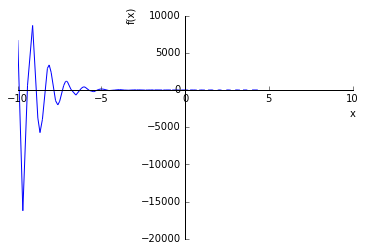

In [7]:
sp.plot(f)

In [8]:
# a onetime pretty print
sp.pprint(f)

 -x         
ℯ  ⋅sin(6⋅x)


In [9]:
#or we can print the latex rendering
sp.latex(f)

'e^{- x} \\sin{\\left (6 x \\right )}'

In [10]:
# first derivative
df = f.diff()
df

   -x               -x         
- ℯ  ⋅sin(6⋅x) + 6⋅ℯ  ⋅cos(6⋅x)

In [11]:
# differentaite f'' wrt x
sp.diff(f,x,1)

   -x               -x         
- ℯ  ⋅sin(6⋅x) + 6⋅ℯ  ⋅cos(6⋅x)

In [12]:
# substitute x with pi
f.subs(x,np.pi)

-3.17530720082064e-17

In [13]:
#%% Numeric Computation from the documentation
from sympy.abc import x

In [14]:
# lambdify using the math module, 10^2 faster than subs
expr = sp.sin(x)/x
f = sp.lambdify(x,expr)
f(3.14)

0.0005072143046136395

In [15]:
# lambdify using numpy
expr = sp.sin(x)/x
f = sp.lambdify(x,expr, "numpy")
f(np.linspace(1,3.14,20))

array([  8.41470985e-01,   8.06076119e-01,   7.67912588e-01,
         7.27262596e-01,   6.84424864e-01,   6.39711977e-01,
         5.93447624e-01,   5.45963742e-01,   4.97597617e-01,
         4.48688937e-01,   3.99576866e-01,   3.50597122e-01,
         3.02079129e-01,   2.54343238e-01,   2.07698064e-01,
         1.62437944e-01,   1.18840569e-01,   7.71647744e-02,
         3.76485431e-02,   5.07214305e-04])

In [16]:
z = np.arange(0,6,.1)
z

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9])

In [17]:
# create an array from 0 to 6 with 300 points
z = np.linspace(0,6,30)
z

array([ 0.        ,  0.20689655,  0.4137931 ,  0.62068966,  0.82758621,
        1.03448276,  1.24137931,  1.44827586,  1.65517241,  1.86206897,
        2.06896552,  2.27586207,  2.48275862,  2.68965517,  2.89655172,
        3.10344828,  3.31034483,  3.51724138,  3.72413793,  3.93103448,
        4.13793103,  4.34482759,  4.55172414,  4.75862069,  4.96551724,
        5.17241379,  5.37931034,  5.5862069 ,  5.79310345,  6.        ])

In [18]:
## ODE Sympy from documentation

# see here for example scripts
# C:\Users\Neal\Anaconda3\Lib\site-packages\sympy\mpmath\tests
from sympy import Function, dsolve, Eq, Derivative, sin,cos,symbols
from sympy.abc import x
import numpy as np
import sympy as sp
import matplotlib.pyplot as mp

In [19]:
f = Function('f')
deq = dsolve(Derivative(f(x), x,x) + 9*f(x), f(x))
deq

f(x) = C₁⋅sin(3⋅x) + C₂⋅cos(3⋅x)

In [20]:
diffeq1_sym = deq.args[1]
diffeq1_sym

C₁⋅sin(3⋅x) + C₂⋅cos(3⋅x)

In [21]:
diffeq1 = diffeq1_sym.subs({'C1':1, 'C2':0.5})
diffeq1

sin(3⋅x) + 0.5⋅cos(3⋅x)

In [22]:
diffeq1_f = sp.lambdify(x,diffeq1, "numpy")
diffeq1_f

<function numpy.<lambda>>

In [23]:
diffeq1arr = diffeq1_f(np.linspace(1,3.14,20))
diffeq1arr

array([-0.35387624, -0.68544104, -0.93948885, -1.08728921, -1.11212728,
       -1.0111941 , -0.79590429, -0.49060511, -0.12982305,  0.24564078,
        0.59332492,  0.87390954,  1.05566313,  1.11803104,  1.05396004,
        0.87069598,  0.5889643 ,  0.24062625, -0.1349244 , -0.49521635])

In [24]:
plt.plot(diffeq1_f(np.linspace(-10,10,2000)));
plt.title('plot of the numpy array');

NameError: name 'plt' is not defined

In [ ]:
sp.plot(diffeq1, title='plot of the sympy function');

In [25]:
eq = sin(x)*cos(f(x)) + cos(x)*sin(f(x))*f(x).diff(x)
dsolve(eq, hint='1st_exact')

⎡             ⎛  C₁  ⎞                   ⎛  C₁  ⎞⎤
⎢f(x) = - acos⎜──────⎟ + 2⋅π, f(x) = acos⎜──────⎟⎥
⎣             ⎝cos(x)⎠                   ⎝cos(x)⎠⎦

In [26]:
#or
dsolve(eq, hint='almost_linear')

⎡             ⎛      C₁     ⎞                   ⎛      C₁     ⎞⎤
⎢f(x) = - acos⎜─────────────⎟ + 2⋅π, f(x) = acos⎜─────────────⎟⎥
⎢             ⎜   __________⎟                   ⎜   __________⎟⎥
⎢             ⎜  ╱     2    ⎟                   ⎜  ╱     2    ⎟⎥
⎣             ⎝╲╱  -cos (x) ⎠                   ⎝╲╱  -cos (x) ⎠⎦

In [27]:
t = symbols('t')
x,y = symbols('x, y', function=True)

In [28]:
eq = (Eq(Derivative(x(t),t), 12*t*x(t) + 8*y(t)), Eq(Derivative(y(t),t), 21*x(t) + 7*t*y(t)))
dsolve(eq)

⎡                     ⌠                                             ⎛   ⌠     
⎢                     ⎮    ⌠         ⌠                              ⎜   ⎮    ⌠
⎢                     ⎮    ⎮ 7⋅t dt  ⎮ 12⋅t dt                      ⎜   ⎮    ⎮
⎢                     ⎮    ⌡         ⌡                              ⎜   ⎮    ⌡
⎢                     ⎮ 8⋅ℯ        ⋅ℯ                               ⎜   ⎮ 8⋅ℯ 
⎢x(t) = C₁⋅x₀ + C₂⋅x₀⋅⎮ ────────────────────── dt, y(t) = C₁⋅y₀ + C₂⎜y₀⋅⎮ ────
⎢                     ⎮            2                                ⎜   ⎮     
⎢                     ⎮          x₀                                 ⎜   ⎮     
⎣                     ⌡                                             ⎝   ⌡     

                                            ⎞⎤
         ⌠               ⌠         ⌠        ⎟⎥
 7⋅t dt  ⎮ 12⋅t dt       ⎮ 7⋅t dt  ⎮ 12⋅t dt⎟⎥
         ⌡               ⌡         ⌡        ⎟⎥
       ⋅ℯ               ℯ        ⋅ℯ         ⎟⎥
────────────────── dt + ────────────────────⎟⎥
      

In [29]:
eq = (Eq(Derivative(x(t),t),x(t)*y(t)*sin(t)), Eq(Derivative(y(t),t),y(t)**2*sin(t)))
dsolve(eq)

   ⎛⎡              C₁                          ⎤⎞
   ⎜⎢            -ℯ                     -1     ⎥⎟
set⎜⎢x(t) = ───────────────, y(t) = ───────────⎥⎟
   ⎜⎢           C₁                  C₁ - cos(t)⎥⎟
   ⎝⎣       C₂⋅ℯ   - cos(t)                    ⎦⎠

In [30]:
#pretty plots
from sympy import sin, symbols, dsolve, pprint, Function
from sympy.solvers.ode import odesimp
x,u2,C1 = symbols('x,u2,C1')
f = Function('f')
eq = dsolve(x*f(x).diff(x) - f(x) - x*sin(f(x)/x), f(x), hint='1st_homogeneous_coeff_subs_indep_div_dep_Integral', simplify=False)
eq2 = odesimp(eq, f(x), 1, set([C1]), hint='1st_homogeneous_coeff_subs_indep_div_dep')

In [31]:
eq

                       x                         
                      ────                       
                      f(x)                       
                       ⌠                         
                       ⎮    ⎛        1   ⎞       
                       ⎮   -⎜u₂ + ───────⎟       
                       ⎮    ⎜        ⎛1 ⎞⎟       
                       ⎮    ⎜     sin⎜──⎟⎟       
                       ⎮    ⎝        ⎝u₂⎠⎠       
log(f(x)) = log(C₁) +  ⎮   ──────────────── d(u₂)
                       ⎮           2             
                       ⎮         u₂              
                       ⌡                         
                                                 

In [32]:
eq2

f(x) = 2⋅x⋅atan(C₁⋅x)

In [33]:
f = Function('f')
eq = dsolve(2*x*f(x) + (x**2 + f(x)**2)*f(x).diff(x), f(x), hint = '1st_homogeneous_coeff_best', simplify=False)
eq

                         ⎛    2    ⎞
                         ⎜ 3⋅x     ⎟
                      log⎜───── + 1⎟
                         ⎜ 2       ⎟
                         ⎝f (x)    ⎠
log(f(x)) = log(C₁) - ──────────────
                            3       

In [34]:
# Ordinary Differential Equations
plt.dps = 15
plt.pretty = True
# solves ODE y'(x) =y(x), y(0)=1
f = sympy.mpmath.odefun(lambda x,y:y,0,1)
for x in [0,1,2.5]:
    print(f(x), exp(x))

NameError: name 'plt' is not defined

In [35]:
z = np.linspace(1,5,200)
fplot = np.array([f(x) for x in z])
fexactplot = np.array([fexact(x) for x in z])
plt.plot(z,fplot, z, fexactplot)
plt.plot(z,fexactplot-fplot)

NameError: name 'fexact' is not defined

In [36]:
f=lambda x: [x[0]**2 - 2*x[0] - x[1] + 0.5, x[0]**2 + 4*x[1]**2 - 4]
x,y=np.mgrid[-0.5:2.5:24j,-0.5:2.5:24j]
U,V=f([x,y])
plt.quiver(x,y,U,V,color='r', \
         linewidths=(0.2,), edgecolors=('k'), \
         headaxislength=5)
plt.show()

NameError: name 'plt' is not defined

In [37]:
# one way to plot using symbolic math
x = sp.var('x')
f =  sp.sin(6*x)*sp.exp(-x)
df = f.diff()
w = np.array([f.subs(x,k) for k in z])
dw = np.array([df.subs(x,k) for k in z])

plt.plot(z,w,z,dw);

NameError: name 'plt' is not defined

In [ ]:
#%% Sympy Plotting

# shows two plots together
from sympy import symbols
from sympy.plotting import plot
x = symbols('x')
p1 = plot(x*x)
p2 = plot(x)
p1.extend(p2)
p1.show()

In [ ]:
#single plot with range
plot(x**2, (x,-5,5));

In [ ]:
#multiple plots with range
plot(x,x**2,x**3, (x,-5,5))

In [38]:
#multiple plots with different ranges
plot( (x, (x,-5,5)), (x**2, (x,-2,2)), (x**3, (x,-3,3)), 
     title='testing multiple plots',
     xlabel='x-label',
     ylabel='ylabel')

NameError: name 'plot' is not defined

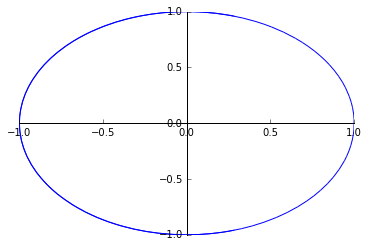

In [39]:
# parametric plots
from sympy import symbols, cos,sin
from sympy.plotting import plot_parametric
u = symbols('x')
plot_parametric(cos(u), sin(u), (u,-5,5))

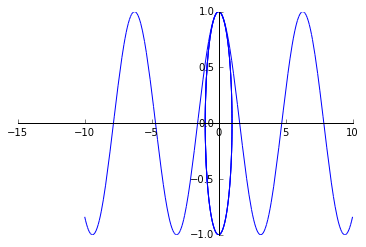

In [40]:
#multiple parametric plots with a single range
plot_parametric((cos(u), sin(u)), (u,cos(u)))

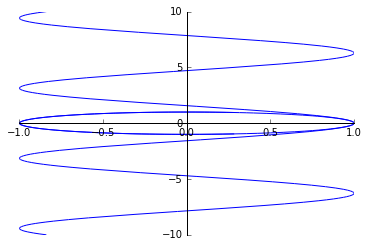

In [41]:
# multiple parametric plots with multiple ranges
plot_parametric((cos(u), sin(u), (u,-5,5)), (cos(u), u, (u,-10,10)))

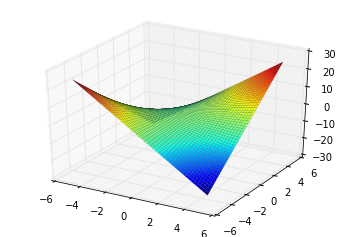

In [42]:
# 3d plots
from sympy import symbols
from sympy.plotting import plot3d
x,y = symbols('x,y')
plot3d(x*y, (x,-5,5), (y,-5,5))

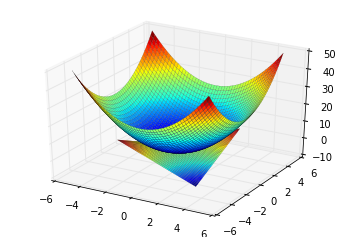

In [43]:
# multiple plots with multiple ranges
plot3d((x**2+y**2, (x,-5,5), (y,-5,5)) , (x*y, (x,-3,3), (y,-3,3)))

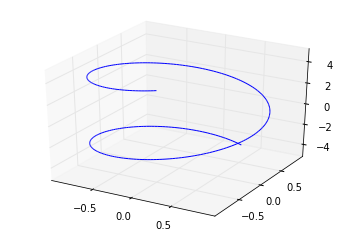

In [44]:
# 3d parametric plots
from sympy import symbols, sin,cos
from sympy.plotting import plot3d_parametric_line
u = symbols('u')
plot3d_parametric_line(cos(u), sin(u), u, (u,-5,5))

In [45]:
#plotting regions
p6 = plot_implicit(y>x**2)

NameError: name 'plot_implicit' is not defined

In [ ]:
#plotting using boolean
p7 = plot_implicit(And(y>x, y >=-x))

In [ ]:
from numpy import pi, sin
I = np.arange(0, 2*pi+0.1, 0.1)
plt.plot(I,sin(I), label='sin(I)')
plt.title('y=sin(x)')
plt.xlabel('x [rad]')
plt.ylabel(' Function y = sin(x)')
plt.text(pi/2,1, 'Max value', ha = 'center', va='bottom')
plt.text(3*pi/2,-1, 'Min value', ha = 'center', va='top')
plt.xticks(np.arange(0, 2*pi, pi/2), 
       ('0', r'$\frac{\pi}{2}$', r'$\pi$',r'$\frac{3\pi}{2}$'))
plt.xlim([0, 2*pi])
plt.ylim([-1.2, 1.2])
plt.grid() 

# Drawing and Diagrams
[index](#Mechpy)

to install pysketcher run these commands for a windows machine

check out tutorials
http://hplgit.github.io/pysketcher/doc/pub/tutorial/._pysketcher002.html  


```bash  
pip install future
choco install imagemagick -y # make sure to run as admin
git clone https://github.com/hplgit/pysketcher
cd pysketcher/
python setup.py install
```

In [ ]:
get_ipython().magic('matplotlib')  # seperate window

from pysketcher import *

L = 8.0
H = 1.0
xpos = 2.0
ypos = 3.0

drawing_tool.set_coordinate_system(xmin=0, xmax=xpos+1.2*L,
                                   ymin=0, ymax=ypos+5*H,
                                   axis=True)
drawing_tool.set_linecolor('blue')
drawing_tool.set_grid(True)
drawing_tool.set_fontsize(22)

P0 = point(xpos,ypos)
main = Rectangle(P0, L, H)
h = L/16  # size of support, clamped wall etc
support = SimplySupportedBeam(P0, h)
clamped = Rectangle(P0 + point(L, 0) - point(0,2*h), h, 6*h).set_filled_curves(pattern='/')
F_pt = point(P0[0]+L/2, P0[1]+H)
force = Force(F_pt + point(0,2*H), F_pt, '$F$').set_linewidth(3)
L_dim = Distance_wText((xpos,P0[1]-3*h), (xpos+L,P0[1]-3*h), '$L$')
beam = Composition({'main': main, 'simply supported end': support,
                    'clamped end': clamped, 'force': force,
                    'L': L_dim})
beam.draw()
beam.draw_dimensions()
drawing_tool.display()

get_ipython().magic('matplotlib inline') # inline plotting

In [ ]:
get_ipython().magic('matplotlib')  # seperate window

from pysketcher import *

L = 8.0
H = 1.0
xpos = 2.0
ypos = 3.0

drawing_tool.set_coordinate_system(xmin=0, xmax=xpos+1.2*L,
                                   ymin=0, ymax=ypos+5*H,
                                   axis=True)
drawing_tool.set_linecolor('blue')
drawing_tool.set_grid(True)
drawing_tool.set_fontsize(22)

P0 = point(xpos,ypos)
main = Rectangle(P0, L, H)
h = L/16  # size of support, clamped wall etc
support = SimplySupportedBeam(P0, h)
clamped = Rectangle(P0 + point(L, 0) - point(0,2*h), h, 6*h).set_filled_curves(pattern='/')
F_pt = point(P0[0]+L/2, P0[1]+H)
force = Force(F_pt + point(0,2*H), F_pt, '$F$').set_linewidth(3)
L_dim = Distance_wText((xpos,P0[1]-3*h), (xpos+L,P0[1]-3*h), '$L$')
beam = Composition({'main': main, 'simply supported end': support,
                    'clamped end': clamped, 'force': force,
                    'L': L_dim})
beam.draw()
beam.draw_dimensions()
drawing_tool.display()

get_ipython().magic('matplotlib inline') # inline plotting

## PLotting

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-0.05, 0.25)
ax.axhline(0)

ax.text(0, 0.1, "Text label", fontsize=14, family="serif")

ax.plot(1, 0, 'o')
ax.annotate("Annotation",
            fontsize=14, family="serif",
            xy=(1, 0), xycoords='data',
            xytext=(+20, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=1.5"))

ax.text(2, 0.1, r"Equation: $i\hbar\partial_t \Psi = \hat{H}\Psi$", fontsize=14, family="serif")

ax.annotate('arc3', xy=(0.5, -1), xycoords='data',
            xytext=(-30, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=.2")
            )

ax.annotate('arc', xy=(1., 1), xycoords='data',
            xytext=(-40, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc,angleA=0,armA=30,rad=10"),
            )

ax.annotate('arc', xy=(1.5, -1), xycoords='data',
            xytext=(-40, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc,angleA=0,armA=20,angleB=-90,armB=15,rad=7"),
            )
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(-1, 3.5)
ax.set_ylim(-0.1, 1)
ax.axhline(0)

ax.text(0, 0.1, "Text label", fontsize=14, family="serif")

ax.text(2, 0.1, r"Equation: $i\hbar\partial_t \Psi = \hat{H}\Psi$", fontsize=14, family="serif")

plt.annotate("Important Value", (.5,.5), xycoords='data',xytext=(1,.2), arrowprops=dict(arrowstyle='->'))


ax.plot([1,0],marker=r'$\circlearrowleft$',ms=50)
ax.plot([0,.5],marker=r'$\downarrow$',ms=100)

ax.plot(1, 0, 'o')

In [ ]:
from pylab import *
from scipy import fft
N = 2**9
F = 25
t = arange(N)/float(N)
x = cos(2*pi*t*F) + rand(len(t))*3
subplot(2,1,1)
plot(t,x)
ylabel('x []')
xlabel('t [seconds]')
title('A cosine wave')
grid()

subplot(2,1,2)
f = t*N
xf = fft(x)
plot(f,abs(xf))
title('Fourier transform of a cosine wave')
xlabel('xf []')
ylabel('xf []')
xlim([0,N])
grid()
show()

# note the spike at 25 hz and 512-25